In [4]:
import pandas as pd

## 파일 읽어오기

In [2]:
url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
titanic = pd.read_csv(url)
titanic[:2]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833


## 데이터 파악

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [4]:
# 컬럼명 확인
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

## 전처리

In [5]:
# 결측치 확인
titanic.isna().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [6]:
# 컬럼명 변경 : Sex -> Gender
titanic.rename(columns={'Sex' : 'Gender'}, inplace=True)
titanic[:2]

,Survived,Pclass,Name,Gender,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833


## csv 파일 저장

In [7]:
titanic.to_csv('titanic.csv', index=False, encoding='UTF-8')
print('저장 완료')

저장 완료


## titanic.csv 파일 읽어오기

In [5]:
titanic = pd.read_csv('titanic.csv')
titanic[:2]

,Survived,Pclass,Name,Gender,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833


## 가설
- 무엇을 분석할 것인가? 
1. 생존자의 성별 비율은 비슷할 것이다.
2. 1등실 승객의 생존율이 높았을 것이다.
3. 사망자는 고령자가 많았을 것이다.

### [가설 1] 생존자의 성별 비율은 비슷할 것이다.

#### [방법 1]

In [9]:
# 생존자 성별 인원 수
survived_gender = titanic[titanic.Survived ==1].groupby('Gender').size()
survived_gender

Gender
female    233
male      109
dtype: int64

In [10]:
# 생존자 성별 비율
survived_gender / survived_gender.sum() * 100

Gender
female    68.128655
male      31.871345
dtype: float64

#### [방법 2]

In [29]:
titanic[titanic.Survived == 1].Gender.value_counts(normalize=True) * 100

Gender
female    68.128655
male      31.871345
Name: proportion, dtype: float64

In [12]:
# 성별별 사망자와 생존자 비율
g_s = titanic.groupby('Gender').Survived.value_counts(normalize=True).sort_index() * 100
g_s

Gender  Survived
female  0           25.796178
        1           74.203822
male    0           80.977312
        1           19.022688
Name: proportion, dtype: float64

In [13]:
g_s.unstack() # 펼치기

Survived,0,1
Gender,,
female,25.796178,74.203822
male,80.977312,19.022688


In [14]:
g_s.unstack('Gender')
g_s.unstack(0)

Gender,female,male
Survived,,
0,25.796178,80.977312
1,74.203822,19.022688


In [15]:
g_s.unstack(0).stack()

Survived  Gender
0         female    25.796178
          male      80.977312
1         female    74.203822
          male      19.022688
dtype: float64

In [16]:
# 행의 인덱스 순서만 바꿈
g_s.swaplevel().sort_index()

Survived  Gender
0         female    25.796178
          male      80.977312
1         female    74.203822
          male      19.022688
Name: proportion, dtype: float64

#### 시각화

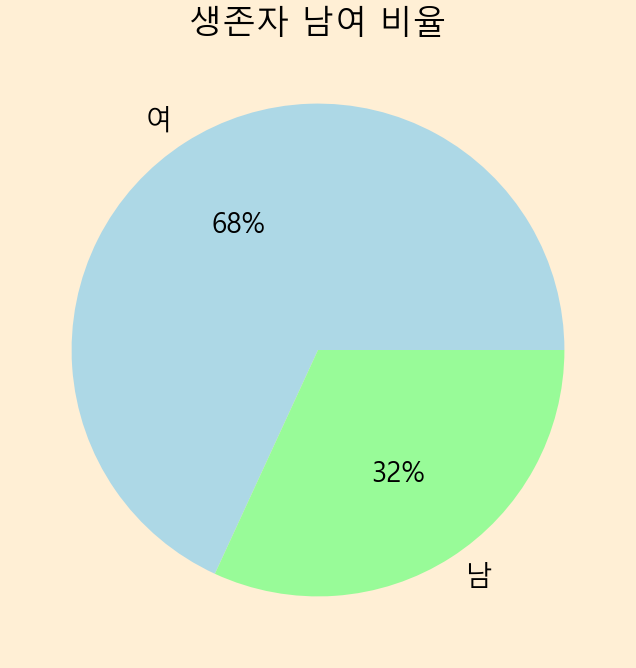

In [41]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('font', size=20) # 글자 사이즈

plt.figure(figsize=(8, 8), facecolor='papayawhip')  #facecolor : 배경색 설정
plt.title('생존자 남여 비율') 

plt.pie(survived_gender, 
        labels=['여', '남'], 
        autopct='%.f%%', 
        colors=['lightblue', 'palegreen'],
       )

# plt.show()

# 저장 시에는 plt.show가 있으면 저장 안 됨
plt.savefig('생존자 남여 비율.jpg', dpi=100)   #dpi : 사진 사이즈 키우기

- [가설 1] 생존자의 성별 비율은 비슷할 것이다.
    - 생존자 342명 중 여자는 233명(68%), 남자는 109명(32%)으로 여자가 남자의 2배 이상으로 나타났다.

### [가설 2] 1등실 승객의 생존율이 높았을 것이다.

In [6]:
titanic[titanic.Survived == 1].groupby('Pclass').size()

Pclass
1    136
2     87
3    119
dtype: int64

In [7]:
survived_pclass = titanic.groupby('Pclass').Survived.value_counts().sort_index()
survived_pclass

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           368
        1           119
Name: count, dtype: int64

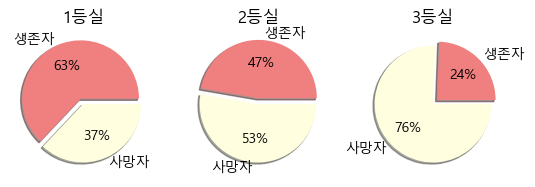

In [12]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('font', size=10)

fig, ax = plt.subplots(1, 3)
fig.subplots_adjust(hspace=0.5)

ax[0].pie(survived_pclass.loc[1].sort_index(ascending=False), 
        autopct='%.f%%', 
        labels=['생존자', '사망자'],
        colors=['LightCoral', 'lightyellow'],
        explode=[0.1, 0],
        shadow=True,
       )
ax[0].set_title('1등실')

ax[1].pie(survived_pclass.loc[2].sort_index(ascending=False), 
        autopct='%.f%%', 
        labels=['생존자', '사망자'],
        colors=['LightCoral', 'lightyellow'],
        explode=[0.1, 0],
        shadow=True,
)
ax[1].set_title('2등실')

ax[2].pie(survived_pclass.loc[3].sort_index(ascending=False), 
        autopct='%.f%%', 
        labels=['생존자', '사망자'],
        colors=['LightCoral', 'lightyellow'],
        explode=[0.1, 0],
        shadow=True,
)
ax[2].set_title('3등실')

plt.show()